Dataset Head:
       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

Mean Squared Error (MSE): 2.91
R-squared Score: 0.91


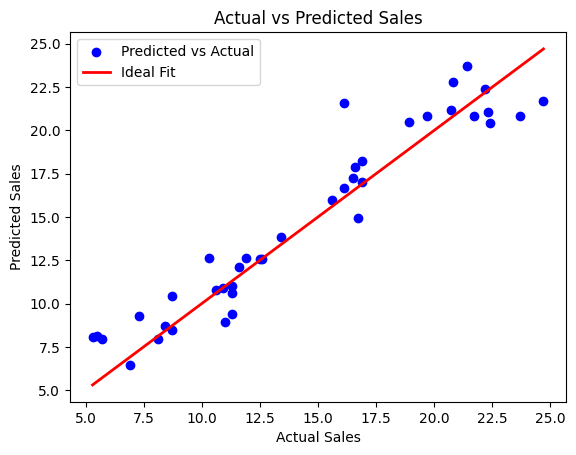


Predicted Sales for new data:
 [14.95279074 18.73107438 23.45376193]


In [1]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load your dataset
# Replace 'sales_data.csv' with the path to your dataset
df = pd.read_csv("advertising.csv")

# Step 2: Explore the dataset
print("Dataset Head:\n", df.head())
print("\nDataset Info:\n")
df.info()

# Step 3: Prepare features (X) and target variable (y)
X = df[["TV", "Radio", "Newspaper"]]  # Independent variables
y = df["Sales"]  # Dependent variable

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Step 8: Visualize results
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Ideal Fit")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()

# Step 9: Predict sales with new advertising budgets
new_data = pd.DataFrame({
    "TV": [150, 200, 250],
    "Radio": [20, 30, 50],
    "Newspaper": [10, 20, 15],
})
predicted_sales = model.predict(new_data)
print("\nPredicted Sales for new data:\n", predicted_sales)
